**1:** Implement thuật toán gradient descent tìm giá trị nhỏ nhất hàm f(x)=x^2, thử các giá trị learning_rate khác nhau (nhỏ, vừa, lớn, rất lớn), vẽ đồ thị loss function theo epoch tương ứng.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
def sqr(x):
  return x * x

def plot_GD(func = sqr, start = 2, lr = [0.01, 1], iter = 10):
  plt.xlabel("Iteration")
  plt.ylabel("Value")
  plt.title("Loss function")

  for rate in lr:
    x = [start]
    fx = [func(start)]
    it = iter
    while it > 0:
      # x_new = x - 2 * lr * x
      x_new = (1-2 * rate) * x[-1]
      x.append(x_new)
      fx.append(func(x_new))
      it -= 1
    plt.plot(fx, label = str(rate))
  plt.legend(loc='upper right', title='Learning rate')
  plt.show()



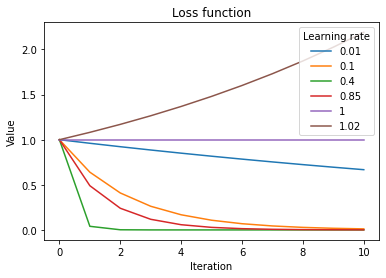

In [ ]:
plot_GD(func = sqr, 
        start = 1, 
        lr = [0.01, 0.1, 0.4, 0.85, 1, 1.02], 
        iter = 10)

**2:** Tự biểu diễn lại bài toán, bắt đầu từ 1 điểm dữ liệu (xi, yi) -> model, loss function, đạo hàm với từng biến. Xong biểu diễn dưới dạng vector. Tính đạo hàm của cả ma trận W với loss function thay vì từng thành phần w0, w1. Chứng minh lại: dJ/dW = X.T * (Y^-Y)


Bài 2. Tự biểu diễn lại bài toán, bắt đầu từ một điểm dữ liệu $(x_i,y_i) \rightarrow$ model, loss function, đạo hàm với từng biến. Xong biểu diễn dưới dạng vector. Tính đạo hàm của cả ma trận w với loss function thay vì với từng thành phần $w_0, w_1$. Chứng minh lại $\dfrac{dJ}{dw} = X^T(\hat{y}-y)$

Sol: Từ điểm dữ liệu $(x_i, y_i)$, ta có đường thẳng $y = w_1.x + w_0$ gần với các điểm dữ liệu nhất.
Tìm các giá trị thoả mãn hàm số:

$$J(w_0, w_1) = \frac 1 {2N} \sum\limits_{i=1}^N (\hat{y_i} - y_i)^2
= \frac 1 {2N}\sum\limits_{i=1}^N (w_0 + w_1x_i - y_i)^2$$
đạt giá trị nhỏ nhất. 
Ta có: 

\begin{cases}
\dfrac{\partial J}{\partial w_0} = \dfrac 1 N \sum\limits_{i=1}^N (w_0 + w_1x_i - y_i) =\dfrac 1 N \sum\limits_{i=1}^N (\hat{y_i} - y_i)\\
\dfrac{\partial J}{\partial w_1} = \dfrac 1 N \sum\limits_{i=1}^N x_i(w_0 + w_1x_i - y_i) =\dfrac 1 N \sum\limits_{i=1}^N x_i(\hat{y_i} - y_i)\\
\end{cases}

Đặt $$
X = \begin{bmatrix}
1 & x_1\\
1 & x_2\\
... & ...\\
1 & x_n
\end{bmatrix}, y = \begin{bmatrix}
y_1\\
y_2\\
...\\
y_n
\end{bmatrix}, w=\begin{bmatrix}
w_0\\ w_1
\end{bmatrix}
$$
Ta có $$\hat{y} = \begin{bmatrix}
w_0 + w_1x_1\\
w_0 + w_1x_2\\
...\\
w_0 + w_1x_n
\end{bmatrix}=Xw$$

$$\dfrac {\partial J} {\partial w_0} = \frac 1 N [1, 1, ... 1]_{1\times n}.(\hat{y}-y)$$

$$\dfrac {\partial J} {\partial w_1} = \frac 1 N [x_0, x_1, ... x_n].(\hat{y}-y)$$

Từ đó ta có 
$$\frac {dJ} {dw} = \begin{bmatrix}
\dfrac {\partial J} {\partial w_0}\\ \dfrac {\partial J} {\partial w_1}
\end{bmatrix} = \frac 1 N X^T(\hat{y}-y)$$

**3:** Hiểu code phần thực hành cho linear regression. Vẽ thêm biểu đồ cho loss function theo epoch. Thay đổi các giá trị learning_rate khác nhau xem đồ thị loss trông thế nào.


(30, 2)
(2, 1)


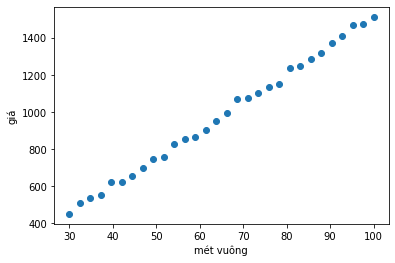

In [ ]:
data = pd.read_csv('data_linear.csv').values
N = data.shape[0]

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

print(x.shape)
print(w.shape)

In [ ]:
numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001

# def gradient_descent(learning_rate, cost):
    
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    # correct the shape dimension
    w = w - learning_rate * np.dot(x.T, r)
    print('step {}, cost: {}'.format(i, cost[i]))

print(w)

step 0, cost: [13929872.64455245]
step 1, cost: [10306582.37422079]
step 2, cost: [7625999.18237673]
step 3, cost: [5642849.69326854]
step 4, cost: [4175675.71851866]
step 5, cost: [3090230.83195734]
step 6, cost: [2287196.82094014]
step 7, cost: [1693096.06938209]
step 8, cost: [1253568.35550934]
step 9, cost: [928396.89128833]
step 10, cost: [687828.48611463]
step 11, cost: [509851.12972016]
step 12, cost: [378179.89312088]
step 13, cost: [280766.8575313]
step 14, cost: [208698.72973386]
step 15, cost: [155381.27570385]
step 16, cost: [115935.94816237]
step 17, cost: [86753.4994753]
step 18, cost: [65163.7354763]
step 19, cost: [49191.19268689]
step 20, cost: [37374.38339803]
step 21, cost: [28632.06953731]
step 22, cost: [22164.32937972]
step 23, cost: [17379.36470576]
step 24, cost: [13839.35126131]
step 25, cost: [11220.37783611]
step 26, cost: [9282.80838638]
step 27, cost: [7849.35533562]
step 28, cost: [6788.85776037]
step 29, cost: [6004.28016513]
step 30, cost: [5423.83373397

Text(0, 0.5, 'loss')

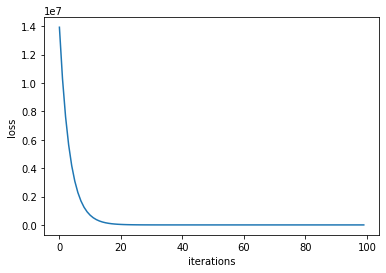

In [ ]:
plt.plot(cost)
plt.xlabel("iterations")
plt.ylabel("loss")

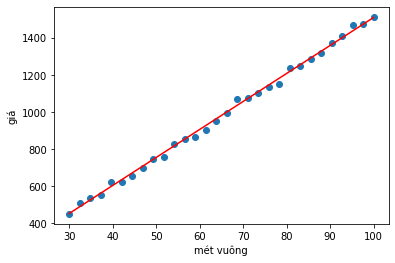

In [ ]:
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.show()

**4:** Dùng thuật toán gradient descent với dữ liệu data_square (để tìm đc parabol khá là tricky).


In [ ]:
data_df = pd.read_csv("/content/data_square.csv")
n_rows = data_df.shape[0]
data_df.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


(30, 3)
(3, 1)


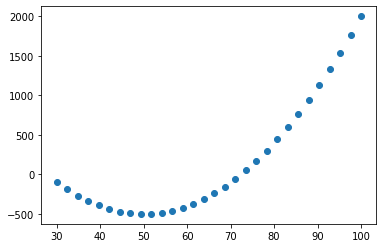

In [ ]:
data = pd.read_csv('data_square.csv').values
N = data.shape[0]

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x, y)

#nomarlize x = x/100
x = np.hstack((np.ones((N, 1)), x/100, np.square(x/100)))
w = np.array([0., 1., 2.]).reshape(-1,1)

print(x.shape)
print(w.shape)

In [ ]:
iters = 10000
cost = np.zeros((iters,1))
lr = 0.0395
for i in range(0, iters):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w = w - lr * np.dot(x.T, r)
    # print('step {}, cost: {}'.format(i, cost[i]))


Text(0, 0.5, 'loss')

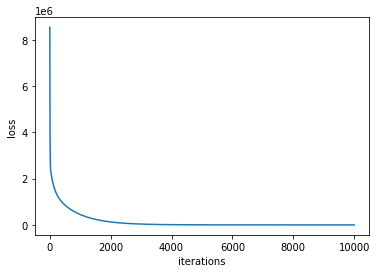

In [ ]:
plt.plot(cost)
plt.xlabel("iterations")
plt.ylabel("loss")

In [ ]:
predict = np.dot(x, w)
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

No handles with labels found to put in legend.


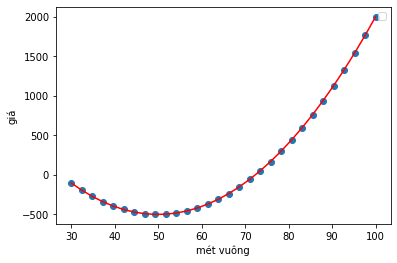

In [ ]:
plt.plot(x, predict, color = "red")
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')
plt.legend()
plt.show()

[Optional] Biểu diễn bài toán dưới dạng ma trận rồi tìm W để minimize J bằng đại số tuyến tính.

Bài 5. [Optional] Biểu diễn bài toán dưới dạng ma trận rồi tìm w để minimize J bằng đại số tuyến tính

Tìm $w_0, w_1$ thỏa mãn hàm số
$$J(w_0, w_1) = \frac 1 {2N} \sum\limits_{i=1}^N (\hat{y_i} - y_i)^2
= \frac 1 {2N}\sum\limits_{i=1}^N (w_0 + w_1x_i - y_i)^2$$
đạt giá trị nhỏ nhất. Ta có

\begin{cases}
\dfrac{\partial J}{\partial w_0} = \dfrac 1 N \sum\limits_{i=1}^N (w_0 + w_1x_i - y_i) =\dfrac 1 N \sum\limits_{i=1}^N (\hat{y_i} - y_i)\\
\dfrac{\partial J}{\partial w_1} = \dfrac 1 N \sum\limits_{i=1}^N x_i(w_0 + w_1x_i - y_i) =\dfrac 1 N \sum\limits_{i=1}^N x_i(\hat{y_i} - y_i)\\
\end{cases}

Từ đó suy ra ma trận Hessian:

$$ H=
\begin{bmatrix}
\dfrac{\partial^2 J}{\partial w_0^2} & \dfrac{\partial^2 J}{\partial w_0\partial w_1} \\
\dfrac{\partial^2 J}{\partial w_0\partial w_1} & \dfrac{\partial^2 J}{\partial w_1^2} 
\end{bmatrix}=\begin{bmatrix}
1 & \dfrac 1 N \sum\limits_{i=1}^N x_i \\
\dfrac 1 N \sum\limits_{i=1}^N x_i & \dfrac 1 N \sum\limits_{i=1}^N x_i^2 
\end{bmatrix}$$

Nhận xét: 

$$|H_1| = 1 > 0$$

$$|H_2| = \dfrac 1 {N^2} \left(N\left(x_1^2 + x_2^2 + ... + x_n^2\right) - \left(x_1+x_2+...+x_n\right)^2\right) \ge 0$$

với $H_i$ là ma trận vuông góc trên bên trái có kích thước $i$. Theo tiêu chuẩn Sylvester, ma trận Hessian đó là ma trận nửa xác định dương (xác định dương nếu tồn tại 2 điểm $x_i$ khác nhau)

Do đó đây là hàm lồi đối với 2 biến $w_0, w_1$ nên tồn tại giá trị cực tiểu địa phương chính là giá trị cực tiểu toàn cục của bài toán. Giờ đây ta sẽ tìm giá trị $w_0, w_1$ khiến cho hàm số đạt cực tiểu bằng cách đặt vector gradient của $J$ theo ma trận $W$ bằng 0 hay

$$\dfrac{dJ}{dw} = X^T(\hat{y}-y) = X^T(Xw-y) = 0$$
$$\Leftrightarrow X^TXw = X^Ty$$
$$\Leftrightarrow w = \left(X^TX\right)^{-1}X^Ty$$